# Classification problem : speaker

### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Data extraction

Data set featuring single English words read by speakers from six different countries for accent detection and recognition

In [4]:
data = pd.read_csv('accent-recognition-mfcc--1/accent-mfcc-data-1.csv')

In [5]:
data

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


Response variable:
language = {ES, FR, GE, IT, UK, US} The six possible accents considered

Explanatory variables:
X1, X2, ..., X12 Obtained using MFCC on the original time domain soundtrack of the maximum 1s of reading of a word

### Data presentation

This is a classification problem : we will try to predict from which country is an audio with a specific the accent from.

In [6]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.362288,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.042034,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.083522,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.323147,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.506037,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


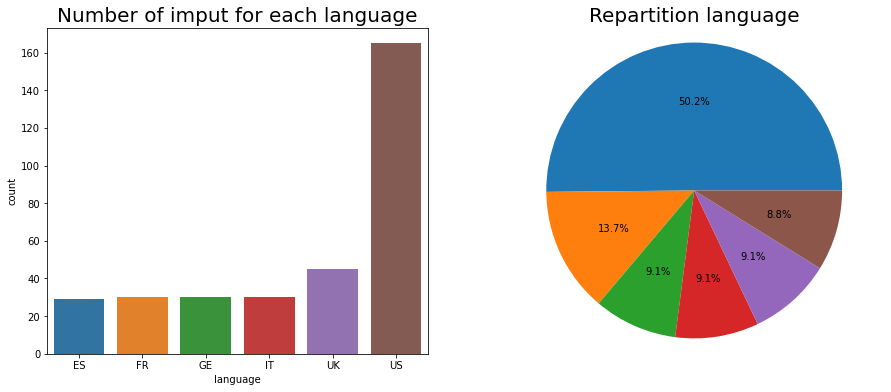

In [13]:
figure = plt.figure(figsize=(15,6))

axes = figure.add_subplot(121)
sns.countplot(x='language', data=data)
plt.title("Number of imput for each language", color="black", fontsize = 20)


axes = figure.add_subplot(122)
axes.pie(data["language"].value_counts(),radius = 10, autopct='%1.1f%%', textprops=dict(color="black"))
plt.title("Repartition language", color="black", fontsize = 20)
axes.axis('equal')

plt.show()

American inputs are by far more present in the dataset : they represent more than half of the whole dataset.

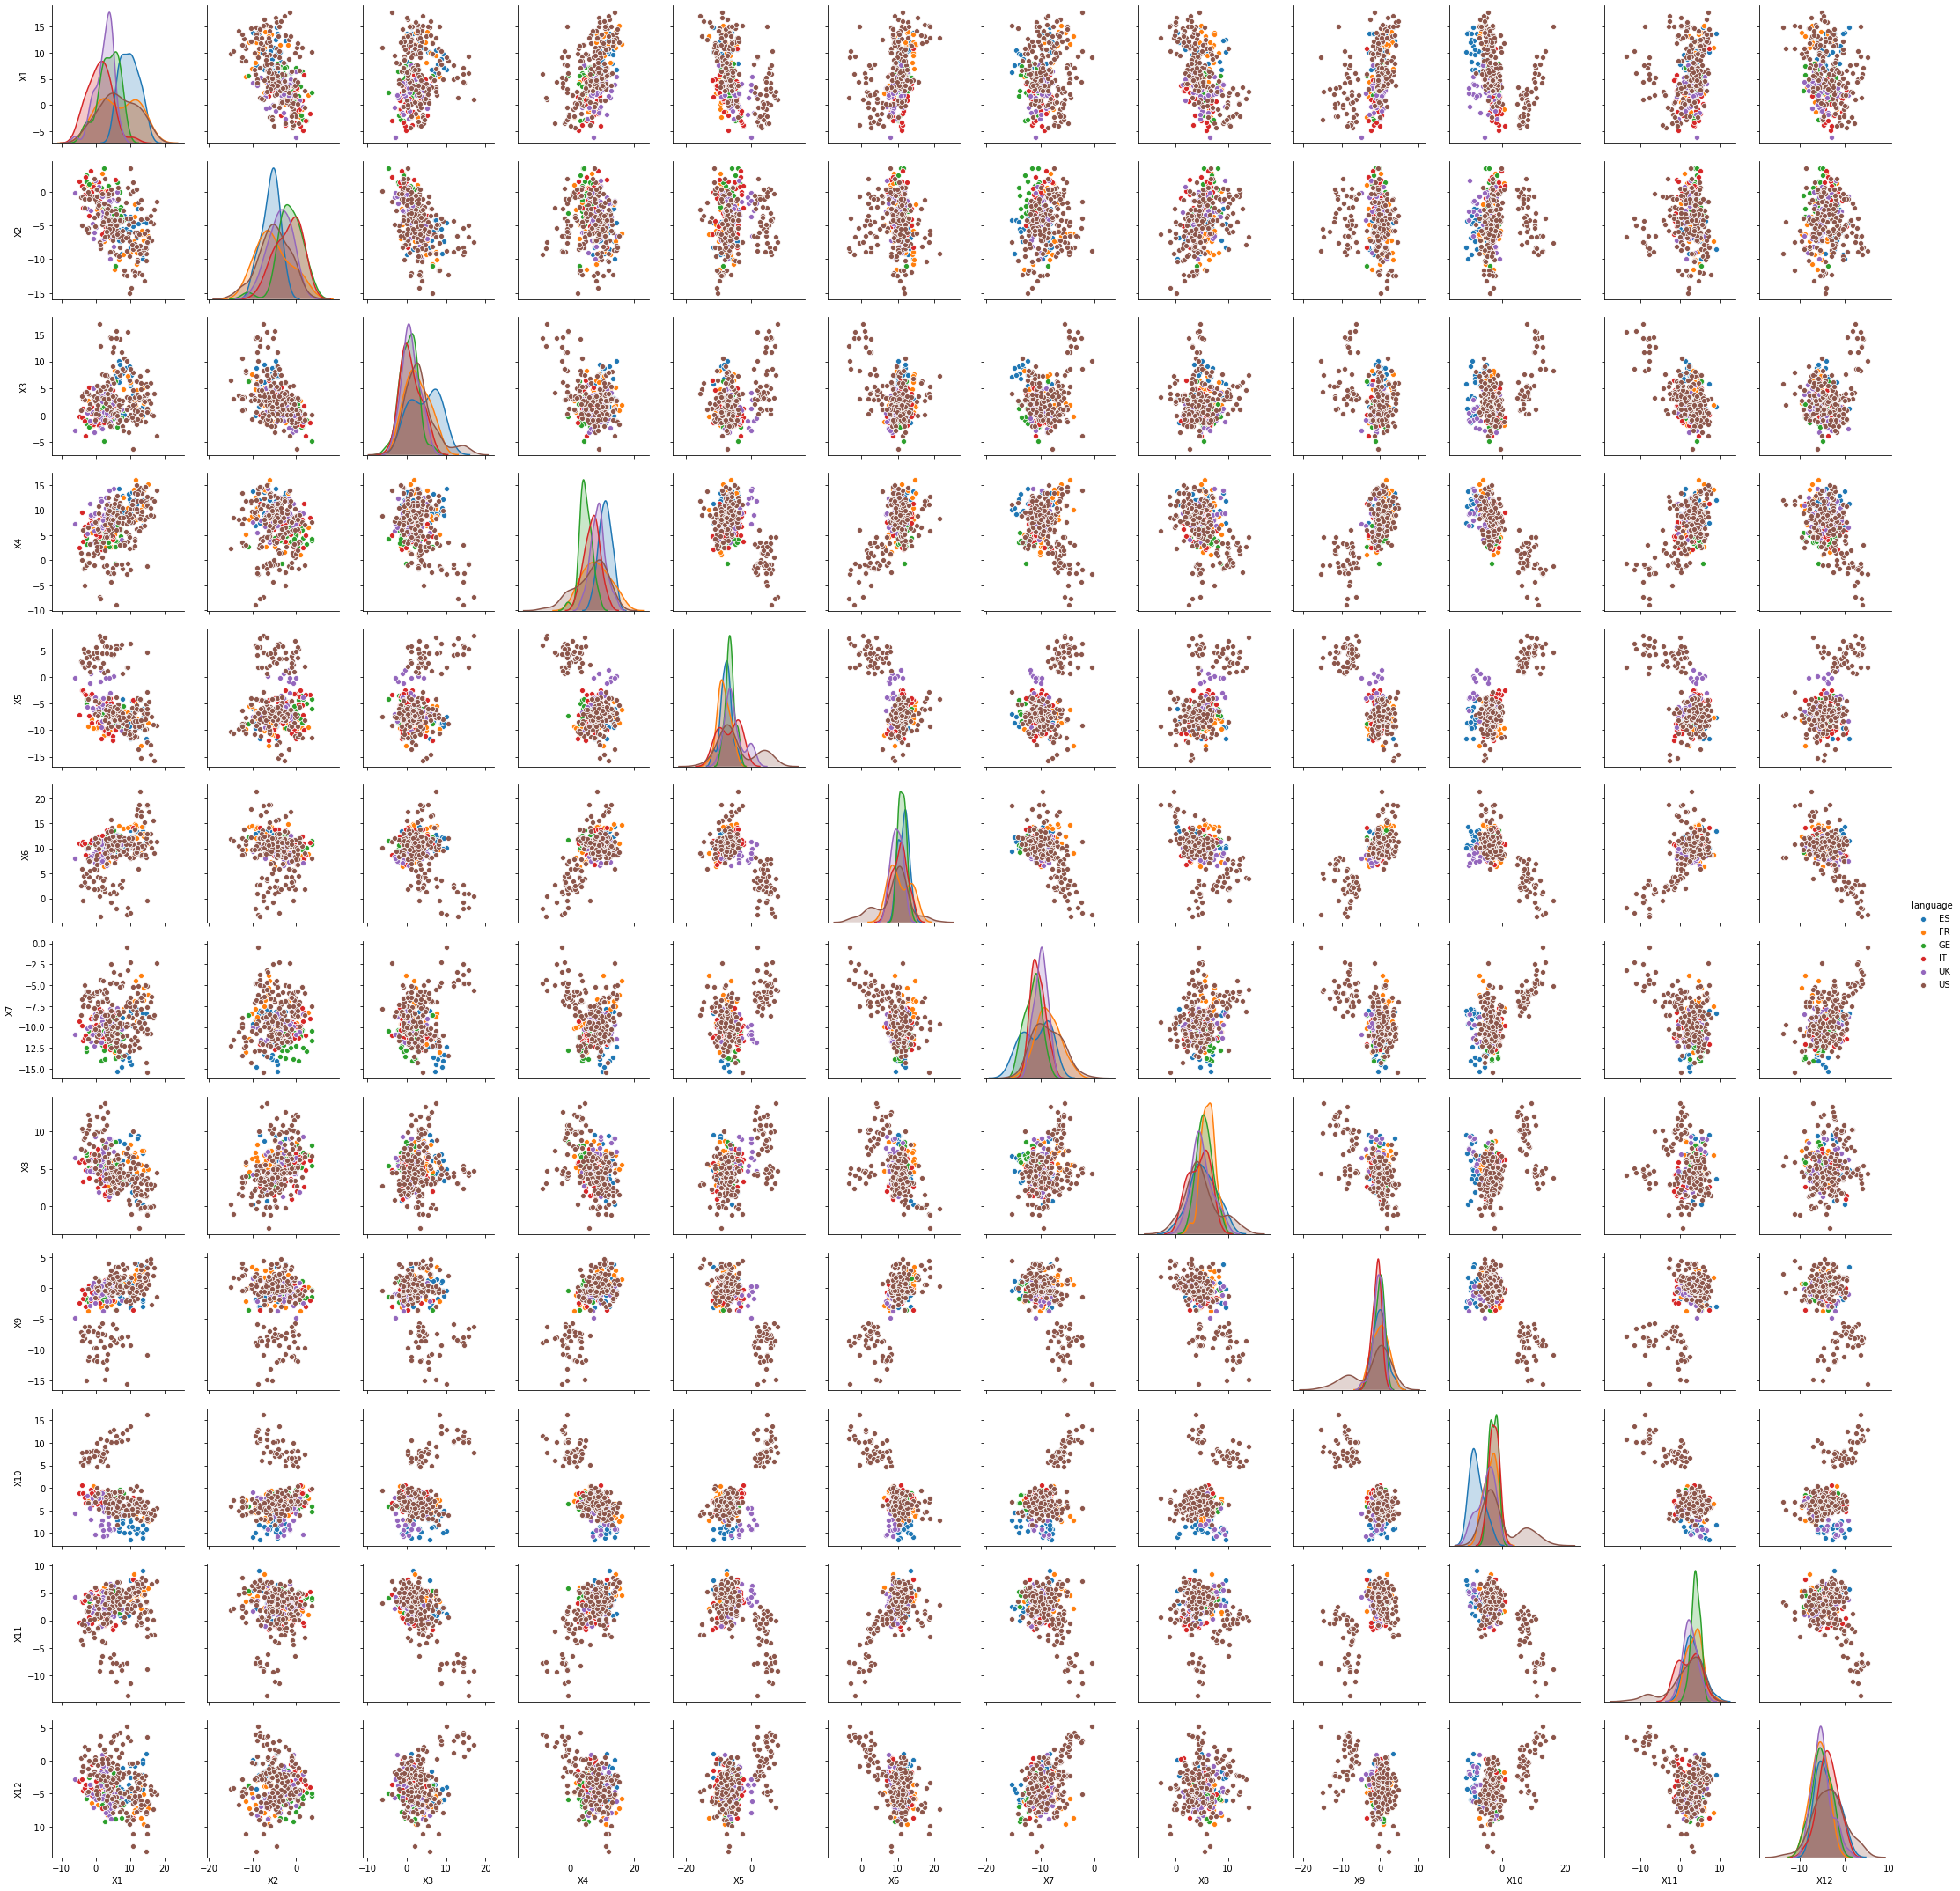

In [10]:
sns.pairplot(data, hue='language')

It is interesting to see the modal distribution. However, there doesn't seem to be any clear seperability between the features. It is hard to see differences as the US data is very disperse and recovers everything.

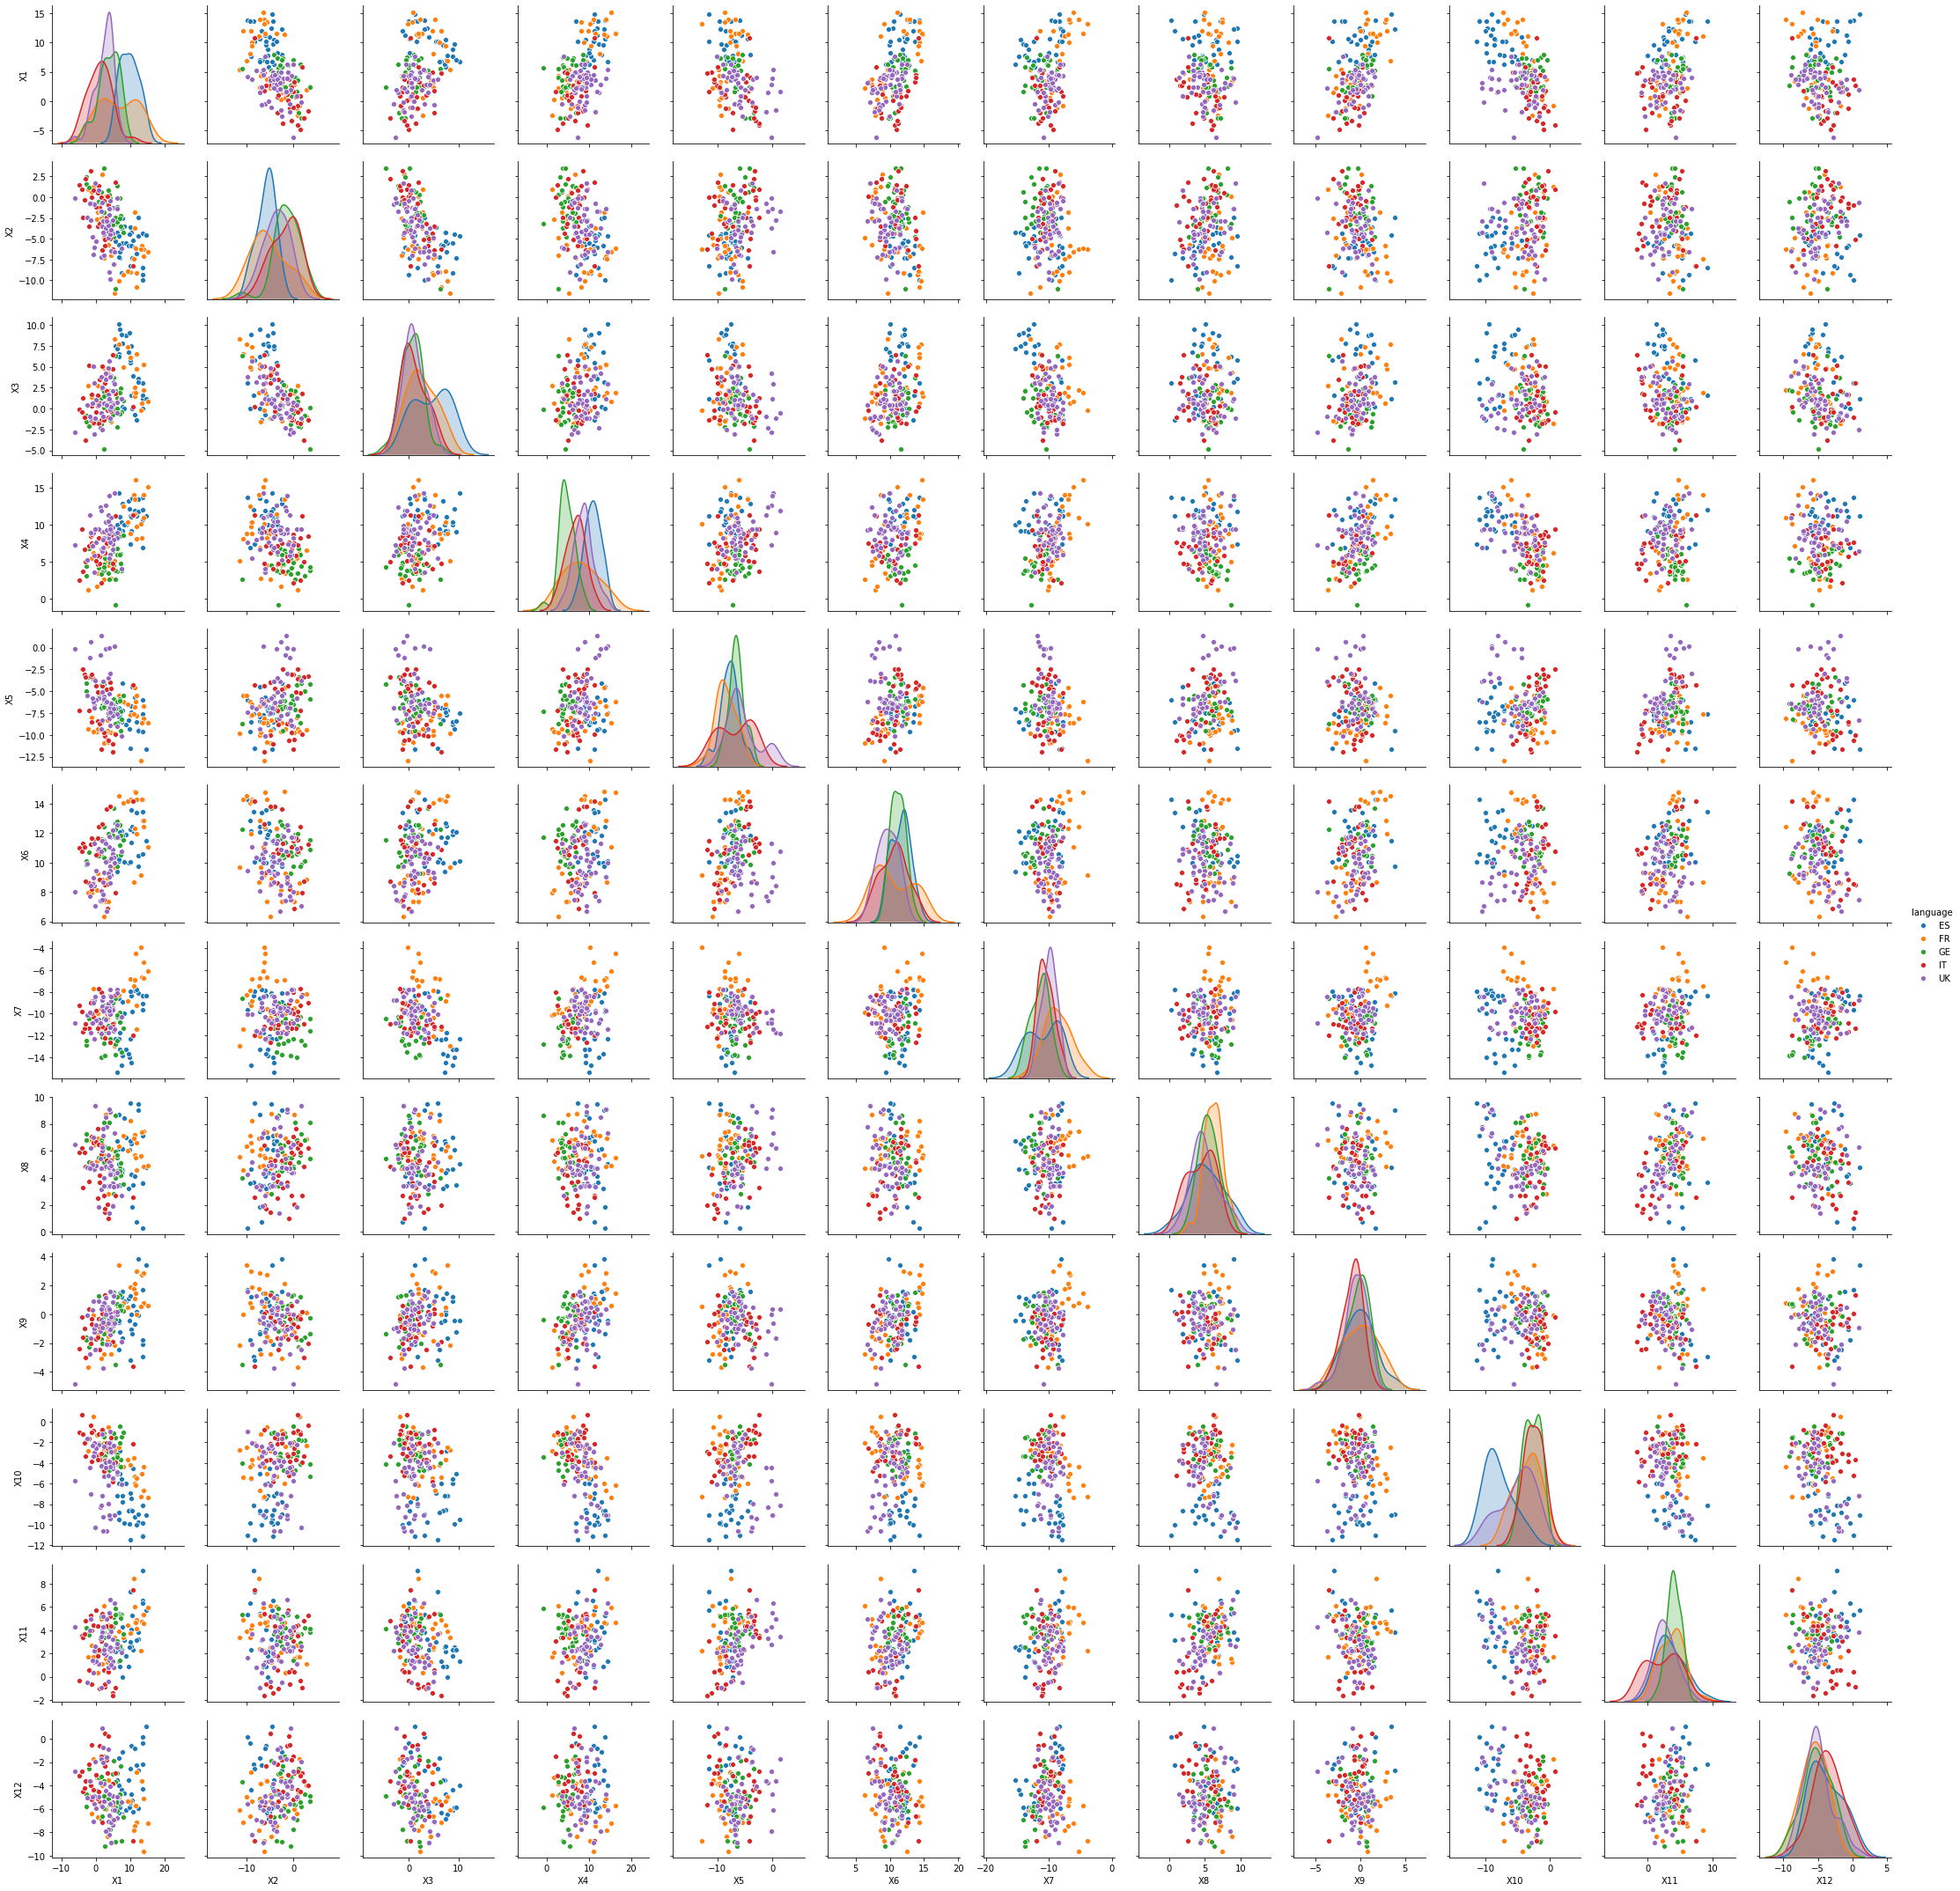

In [14]:
data_without_US = data[data["language"] != "US"]
sns.pairplot(data_without_US, hue='language')

Without the US datapoints, we can see that the separability is much more clearer. We can clearly different clusters for each language.

<AxesSubplot:>

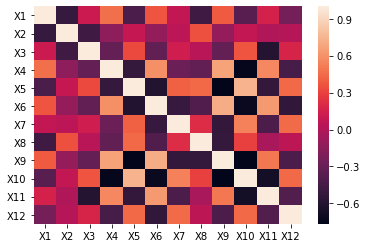

In [11]:
sns.heatmap(data.corr())

There appears to be a an important correlation between certain of the features of the dataset. This iwill have an impact in the classification algorithms afterwards.

### Data preparation

In [28]:
X = data.drop(['language'], axis=1)
y = data['language']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

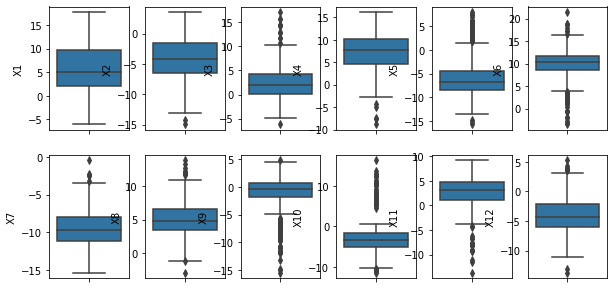

In [29]:
f, axes = plt.subplots(2, 6)
f.set_size_inches(10, 5)
cols = np.array(X_train.columns).reshape(2, 6)
for i in range(2):
    for j in range(6):       
        sns.boxplot(data[cols[i, j]], orient='v', ax=axes[i, j])

Even if there are some outliers as these features are extracted directly from the audio files, it seems like all features could be significant.

### Kernel SVM

In [30]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          ES       0.00      0.00      0.00        11
          FR       0.00      0.00      0.00         5
          GE       0.00      0.00      0.00        11
          IT       0.17      0.17      0.17         6
          UK       1.00      0.21      0.35        14
          US       0.49      1.00      0.65        36

    accuracy                           0.48        83
   macro avg       0.28      0.23      0.20        83
weighted avg       0.39      0.48      0.36        83



C:\Users\remij\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\remij\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\remij\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see that the f1-score is very different from one country to another. The accuracy rate is not very satisfying but the result is very dependant of the split function (small number of entries).

### Logistic regression

In [26]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          ES       0.75      0.55      0.63        11
          FR       0.43      0.60      0.50         5
          GE       0.80      0.73      0.76        11
          IT       0.33      0.17      0.22         6
          UK       0.75      0.64      0.69        14
          US       0.67      0.81      0.73        36

    accuracy                           0.67        83
   macro avg       0.62      0.58      0.59        83
weighted avg       0.67      0.67      0.67        83



C:\Users\remij\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We can see here that the results are better. The accuracy rate is a greater and becomes sufficiently satisfying

### KNN Classification

In [34]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          ES       0.83      0.91      0.87        11
          FR       0.83      1.00      0.91         5
          GE       0.64      0.64      0.64        11
          IT       0.40      0.33      0.36         6
          UK       0.77      0.71      0.74        14
          US       0.89      0.89      0.89        36

    accuracy                           0.80        83
   macro avg       0.73      0.75      0.73        83
weighted avg       0.79      0.80      0.79        83



KNN classification has siginificant better result as the accuracy is much better with this method. It might be very difficult to get any better result because of the overlapping between the classes.

In [35]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

X_without_US = data_without_US.drop(['language'], axis=1)
y_without_US = data_without_US['language']
X_without_US_train, X_without_US_test, y_without_US_train, y_without_US_test = train_test_split(
    X_without_US,y_without_US, test_size=0.25, random_state=0)


classifier.fit(X_without_US_train,y_without_US_train)
y_without_US_pred= classifier.predict(X_without_US_test)

print(classification_report(y_without_US_test,y_without_US_pred))

              precision    recall  f1-score   support

          ES       1.00      1.00      1.00         6
          FR       0.89      1.00      0.94         8
          GE       0.50      1.00      0.67         3
          IT       0.88      0.78      0.82         9
          UK       1.00      0.80      0.89        15

    accuracy                           0.88        41
   macro avg       0.85      0.92      0.86        41
weighted avg       0.91      0.88      0.88        41



Without the US accents, the model is even more performant as we could have predicted with the separability factor deptermined earlier.

### Confusion matrix

Text(0.5, 15.0, 'predicted labels')

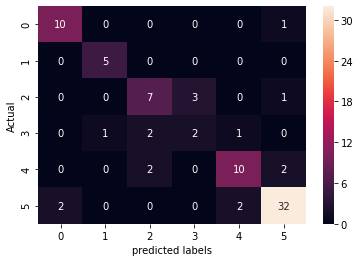

In [36]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
plt.xlabel("true labels")
plt.xlabel("predicted labels")

We can see that there are a few missclassification.

## Conclusion